In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer


In [ ]:
df = pd.read_excel('data.xlsx')

In [ ]:
df.head()

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TYPE OF ADMSN,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,EMERGENCY,0,660293.0,13.400439,25,12,13,Y,1,38000
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,809130.0,13.603715,41,20,21,Y,1,39690
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,362231.0,12.800037,18,9,9,N,0,0
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,629990.0,13.353459,14,13,1,Y,1,89450
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,444876.0,13.005551,24,12,12,N,0,0


In [ ]:
df.dtypes

SL.                               int64
AGE                             float64
GENDER                           object
MALE                              int64
MARITAL STATUS                   object
UNMARRIED                         int64
KEY COMPLAINTS -CODE             object
ACHD                              int64
CAD-DVD                           int64
CAD-SVD                           int64
CAD-TVD                           int64
CAD-VSD                           int64
OS-ASD                            int64
other- heart                      int64
other- respiratory                int64
other-general                     int64
other-nervous                     int64
other-tertalogy                   int64
PM-VSD                            int64
RHD                               int64
BODY WEIGHT                     float64
BODY HEIGHT                       int64
HR PULSE                          int64
BP -HIGH                        float64
BP-LOW                          float64


In [ ]:
df.shape

(248, 51)

In [ ]:
df_1_term = df[['BODY WEIGHT', 'TOTAL COST TO HOSPITAL ']].copy()

In [ ]:
x = np.array(df_1_term.iloc[:,0]) #read first column
y = np.array(df_1_term.iloc[:,1]) #read second column

m = len(y)
print(m)

248


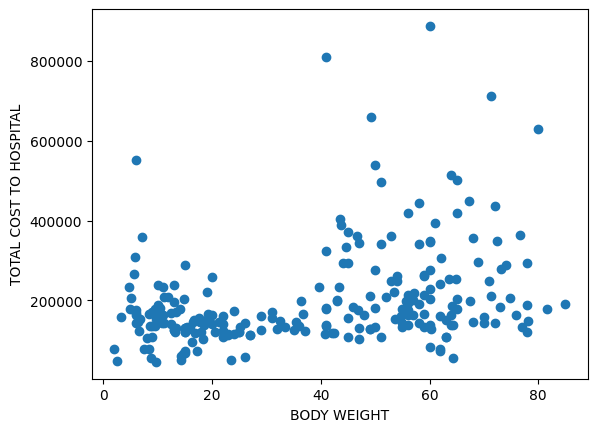

In [ ]:
plt.scatter(x,y)
plt.xlabel('BODY WEIGHT')
plt.ylabel('TOTAL COST TO HOSPITAL')
plt.show()

In [ ]:
df_1_term['BODY WEIGHT']

0      49.2
1      41.0
2      46.6
3      80.0
4      58.0
       ... 
243    69.0
244    57.0
245    58.0
246    65.0
247    71.0
Name: BODY WEIGHT, Length: 248, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(x.reshape(-1, 1), y)

In [ ]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 129426.40020037326
betas = [1846.70288588]


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

In [ ]:
df_1_term.columns = df_1_term.columns.str.replace(" ","_")

In [ ]:
df_1_term.head()

,BODY_WEIGHT,TOTAL_COST_TO_HOSPITAL_
0,49.2,660293.0
1,41.0,809130.0
2,46.6,362231.0
3,80.0,629990.0
4,58.0,444876.0


In [ ]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model1 = smf.ols('TOTAL_COST_TO_HOSPITAL_ ~ BODY_WEIGHT', data=df_1_term)
model1 = model1.fit()
   

In [ ]:
print(model1.summary())

                               OLS Regression Results                              
Dep. Variable:     TOTAL_COST_TO_HOSPITAL_   R-squared:                       0.121
Model:                                 OLS   Adj. R-squared:                  0.118
Method:                      Least Squares   F-statistic:                     33.96
Date:                     Sun, 02 Apr 2023   Prob (F-statistic):           1.76e-08
Time:                             00:46:30   Log-Likelihood:                -3241.1
No. Observations:                      248   AIC:                             6486.
Df Residuals:                          246   BIC:                             6493.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


In [ ]:
df.head()

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TYPE OF ADMSN,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,EMERGENCY,0,660293.0,13.400439,25,12,13,Y,1,38000
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,809130.0,13.603715,41,20,21,Y,1,39690
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,362231.0,12.800037,18,9,9,N,0,0
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,629990.0,13.353459,14,13,1,Y,1,89450
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,444876.0,13.005551,24,12,12,N,0,0


In [ ]:
df.columns = df.columns.str.replace(" ","_")

In [ ]:
df.columns

Index(['SL.', 'AGE', 'GENDER', 'MALE', 'MARITAL_STATUS', 'UNMARRIED',
       'KEY_COMPLAINTS_-CODE', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD',
       'CAD-VSD', 'OS-ASD', 'other-_heart', 'other-_respiratory',
       'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD',
       'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_-HIGH', 'BP-LOW', 'RR',
       'PAST_MEDICAL_HISTORY_CODE', 'Diabetes1', 'Diabetes2', 'hypertension1',
       'hypertension2', 'hypertension3', 'other', 'HB', 'UREA', 'CREATININE',
       'MODE_OF_ARRIVAL', 'AMBULANCE', 'TRANSFERRED',
       'STATE_AT_THE_TIME_OF_ARRIVAL', 'ALERT', 'TYPE_OF_ADMSN', 'ELECTIVE',
       'TOTAL_COST_TO_HOSPITAL_', 'Ln(Total_Cost)', 'TOTAL_LENGTH_OF_STAY',
       'LENGTH_OF_STAY_-_ICU', 'LENGTH_OF_STAY-_WARD', 'IMPLANT_USED_(Y/N)',
       'IMPLANT_', 'COST_OF_IMPLANT'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'other- heart'),
  Text(1, 0, 'CAD-DVD'),
  Text(2, 0, 'CAD-TVD'),
  Text(3, 0, 'RHD'),
  Text(4, 0, 'CAD-SVD'),
  Text(5, 0, 'other- respiratory'),
  Text(6, 0, 'other-nervous'),
  Text(7, 0, 'other-tertalogy'),
  Text(8, 0, 'ACHD'),
  Text(9, 0, 'OS-ASD'),
  Text(10, 0, 'PM-VSD'),
  Text(11, 0, 'CAD-VSD'),
  Text(12, 0, 'other-general')])

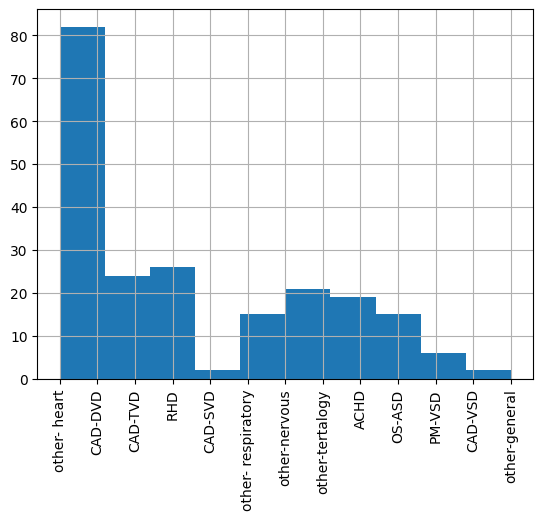

In [ ]:
df['KEY_COMPLAINTS_-CODE'].hist()
plt.xticks(rotation=90)

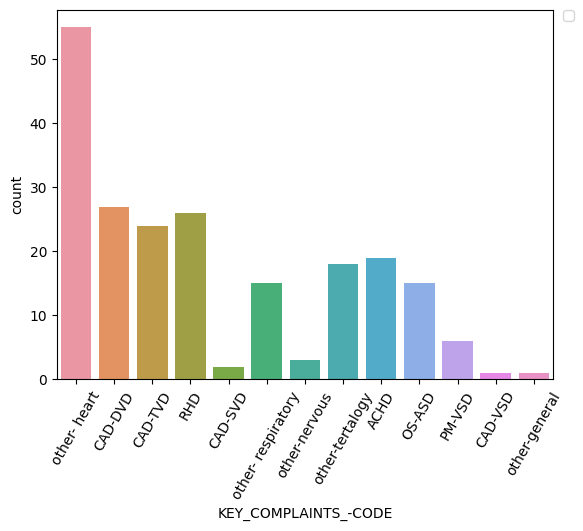

In [ ]:
sns.countplot(x="KEY_COMPLAINTS_-CODE", data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)  
plt.xticks(rotation=60)
plt.show()

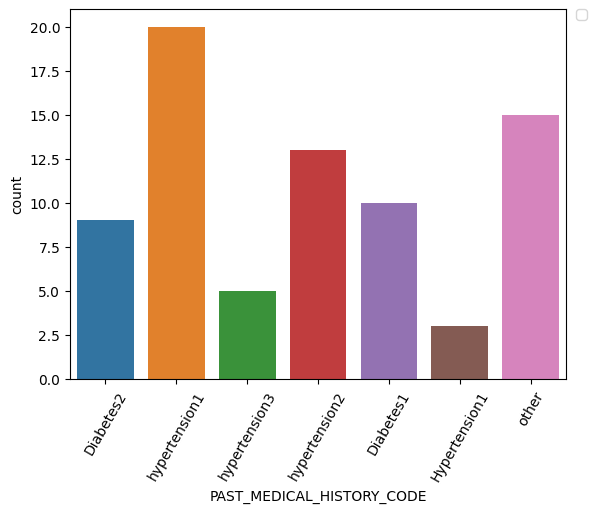

In [ ]:
sns.countplot(x="PAST_MEDICAL_HISTORY_CODE", data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)  
plt.xticks(rotation=60)
plt.show()

In [ ]:
df1=df

In [ ]:
df1.drop(['GENDER', 'MARITAL_STATUS', 'KEY_COMPLAINTS_-CODE', 'PAST_MEDICAL_HISTORY_CODE', 'MODE_OF_ARRIVAL', 
         'STATE_AT_THE_TIME_OF_ARRIVAL','TYPE_OF_ADMSN' , 'IMPLANT_USED_(Y/N)'], axis = 1, inplace = True)

In [ ]:
df1.head()

,SL.,AGE,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,...,TRANSFERRED,ALERT,ELECTIVE,TOTAL_COST_TO_HOSPITAL_,Ln(Total_Cost),TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_-_ICU,LENGTH_OF_STAY-_WARD,IMPLANT_,COST_OF_IMPLANT
0,1,58.0,0,0,0,0,0,0,0,0,...,0,1,0,660293.0,13.400439,25,12,13,1,38000
1,2,59.0,0,0,0,1,0,0,0,0,...,0,1,0,809130.0,13.603715,41,20,21,1,39690
2,3,82.0,0,0,0,0,0,1,0,0,...,0,1,1,362231.0,12.800037,18,9,9,0,0
3,4,46.0,0,0,0,1,0,0,0,0,...,0,1,0,629990.0,13.353459,14,13,1,1,89450
4,5,60.0,0,0,0,1,0,0,0,0,...,0,1,0,444876.0,13.005551,24,12,12,0,0


In [ ]:
df1.columns

Index(['SL.', 'AGE', 'MALE', 'UNMARRIED', 'ACHD', 'CAD-DVD', 'CAD-SVD',
       'CAD-TVD', 'CAD-VSD', 'OS-ASD', 'other-_heart', 'other-_respiratory',
       'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD',
       'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_-HIGH', 'BP-LOW', 'RR',
       'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'AMBULANCE',
       'TRANSFERRED', 'ALERT', 'ELECTIVE', 'TOTAL_COST_TO_HOSPITAL_',
       'Ln(Total_Cost)', 'TOTAL_LENGTH_OF_STAY', 'LENGTH_OF_STAY_-_ICU',
       'LENGTH_OF_STAY-_WARD', 'IMPLANT_', 'COST_OF_IMPLANT'],
      dtype='object')

In [ ]:
df.isna().sum().sort_values(ascending=False)

CREATININE                 33
BP-LOW                     23
BP_-HIGH                   23
UREA                       13
HB                          2
RR                          0
Diabetes2                   0
hypertension1               0
hypertension2               0
hypertension3               0
other                       0
AMBULANCE                   0
TRANSFERRED                 0
ALERT                       0
ELECTIVE                    0
TOTAL_COST_TO_HOSPITAL_     0
Ln(Total_Cost)              0
TOTAL_LENGTH_OF_STAY        0
LENGTH_OF_STAY_-_ICU        0
LENGTH_OF_STAY-_WARD        0
IMPLANT_                    0
Diabetes1                   0
SL.                         0
AGE                         0
HR_PULSE                    0
MALE                        0
UNMARRIED                   0
ACHD                        0
CAD-DVD                     0
CAD-SVD                     0
CAD-TVD                     0
CAD-VSD                     0
OS-ASD                      0
other-_hea

In [ ]:
df1 = df1[df1['CREATININE'].notna()] 
df1 = df1[df1['BP-LOW'].notna()] 
df1 = df1[df1['BP_-HIGH'].notna()] 
df1 = df1[df1['UREA'].notna()] 
df1 = df1[df1['HB'].notna()] 

In [ ]:
X = df1[['SL.', 'AGE', 'MALE', 'UNMARRIED', 'ACHD', 'CAD-DVD', 'CAD-SVD',
       'CAD-TVD', 'CAD-VSD', 'OS-ASD', 'other-_heart', 'other-_respiratory',
       'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD',
       'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_-HIGH', 'BP-LOW', 'RR',
       'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'AMBULANCE',
       'TRANSFERRED', 'ALERT', 'ELECTIVE', 'TOTAL_LENGTH_OF_STAY', 'LENGTH_OF_STAY_-_ICU',
       'LENGTH_OF_STAY-_WARD', 'IMPLANT_', 'COST_OF_IMPLANT']] 
Y = df1['TOTAL_COST_TO_HOSPITAL_']

In [ ]:
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     TOTAL_COST_TO_HOSPITAL_   R-squared:                       0.893
Model:                                 OLS   Adj. R-squared:                  0.864
Method:                      Least Squares   F-statistic:                     31.17
Date:                     Sun, 02 Apr 2023   Prob (F-statistic):           8.93e-55
Time:                             01:05:11   Log-Likelihood:                -2307.4
No. Observations:                      191   AIC:                             4697.
Df Residuals:                          150   BIC:                             4830.
Df Model:                               40                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
SL.                   -239.4332     72.617     -3.297      0.001    -382.918     -95.948
AGE                    160.7531    392.290      0.410      0.683    -614.375     935.881
MALE                 -6664.7531   8888.517     -0.750      0.455   -2.42e+04    1.09e+04
UNMARRIED             1.051e+04    1.8e+04      0.583      0.561   -2.51e+04    4.61e+04
ACHD                  1.539e+04    1.8e+04      0.854      0.394   -2.02e+04     5.1e+04
CAD-DVD               2.288e+04   1.69e+04      1.350      0.179   -1.06e+04    5.64e+04
CAD-SVD               4.653e+04   3.98e+04      1.170      0.244    -3.2e+04    1.25e+05
CAD-TVD               3.207e+04   1.78e+04      1.805      0.073   -3044.917    6.72e+04
CAD-VSD               3.899e+04   5.11e+04      0.763      0.446   -6.19e+04     1.4e+05
OS-ASD                3.114e+04   1.97e+04      1.583      0.116   -7730.835       7e+04
other-_heart          1.225e+04    1.5e+04      0.816      0.416   -1.74e+04    4.19e+04
other-_respiratory    1.421e+04   2.51e+04      0.565      0.573   -3.55e+04    6.39e+04
other-general        -4.724e+04   5.73e+04     -0.825      0.411    -1.6e+05    6.59e+04
other-nervous         1.458e+04   5.12e+04      0.284      0.776   -8.67e+04    1.16e+05
other-tertalogy       3.307e+04    2.1e+04      1.578      0.117   -8343.983    7.45e+04
PM-VSD                5.129e+04   2.98e+04      1.719      0.088   -7675.389     1.1e+05
RHD                  -1969.6758   2.12e+04     -0.093      0.926   -4.38e+04    3.99e+04
BODY_WEIGHT           -222.8687    480.124     -0.464      0.643   -1171.549     725.811
BODY_HEIGHT            208.0969    211.633      0.983      0.327    -210.069     626.263
HR_PULSE               388.9466    239.661      1.623      0.107     -84.600     862.494
BP_-HIGH               261.9605    294.282      0.890      0.375    -319.512     843.433
BP-LOW                  54.4014    401.526      0.135      0.892    -738.976     847.778
RR                   -1973.3414   1170.793     -1.685      0.094   -4286.718     340.036
Diabetes1            -7333.9950   2.01e+04     -0.365      0.715    -4.7e+04    3.23e+04
Diabetes2             3.771e+04   2.24e+04      1.687      0.094   -6453.734    8.19e+04
hypertension1        -1.297e+04    1.5e+04     -0.862      0.390   -4.27e+04    1.68e+04
hypertension2        -1.738e+04   1.88e+04     -0.926      0.356   -5.45e+04    1.97e+04
hypertension3        -1.734e+04   2.52e+04     -0.688      0.493   -6.71e+04    3.25e+04
other                  573.7562   1.52e+04      0.038      0.970   -2.94e+04    3.06e+04
HB                     861.9183   1475.656      0.584      0.560   -2053.838    3777.675
UREA                  -419.1980    329.279     -1.273      0.205   -1069.822     231.426
CR

<Axes: >

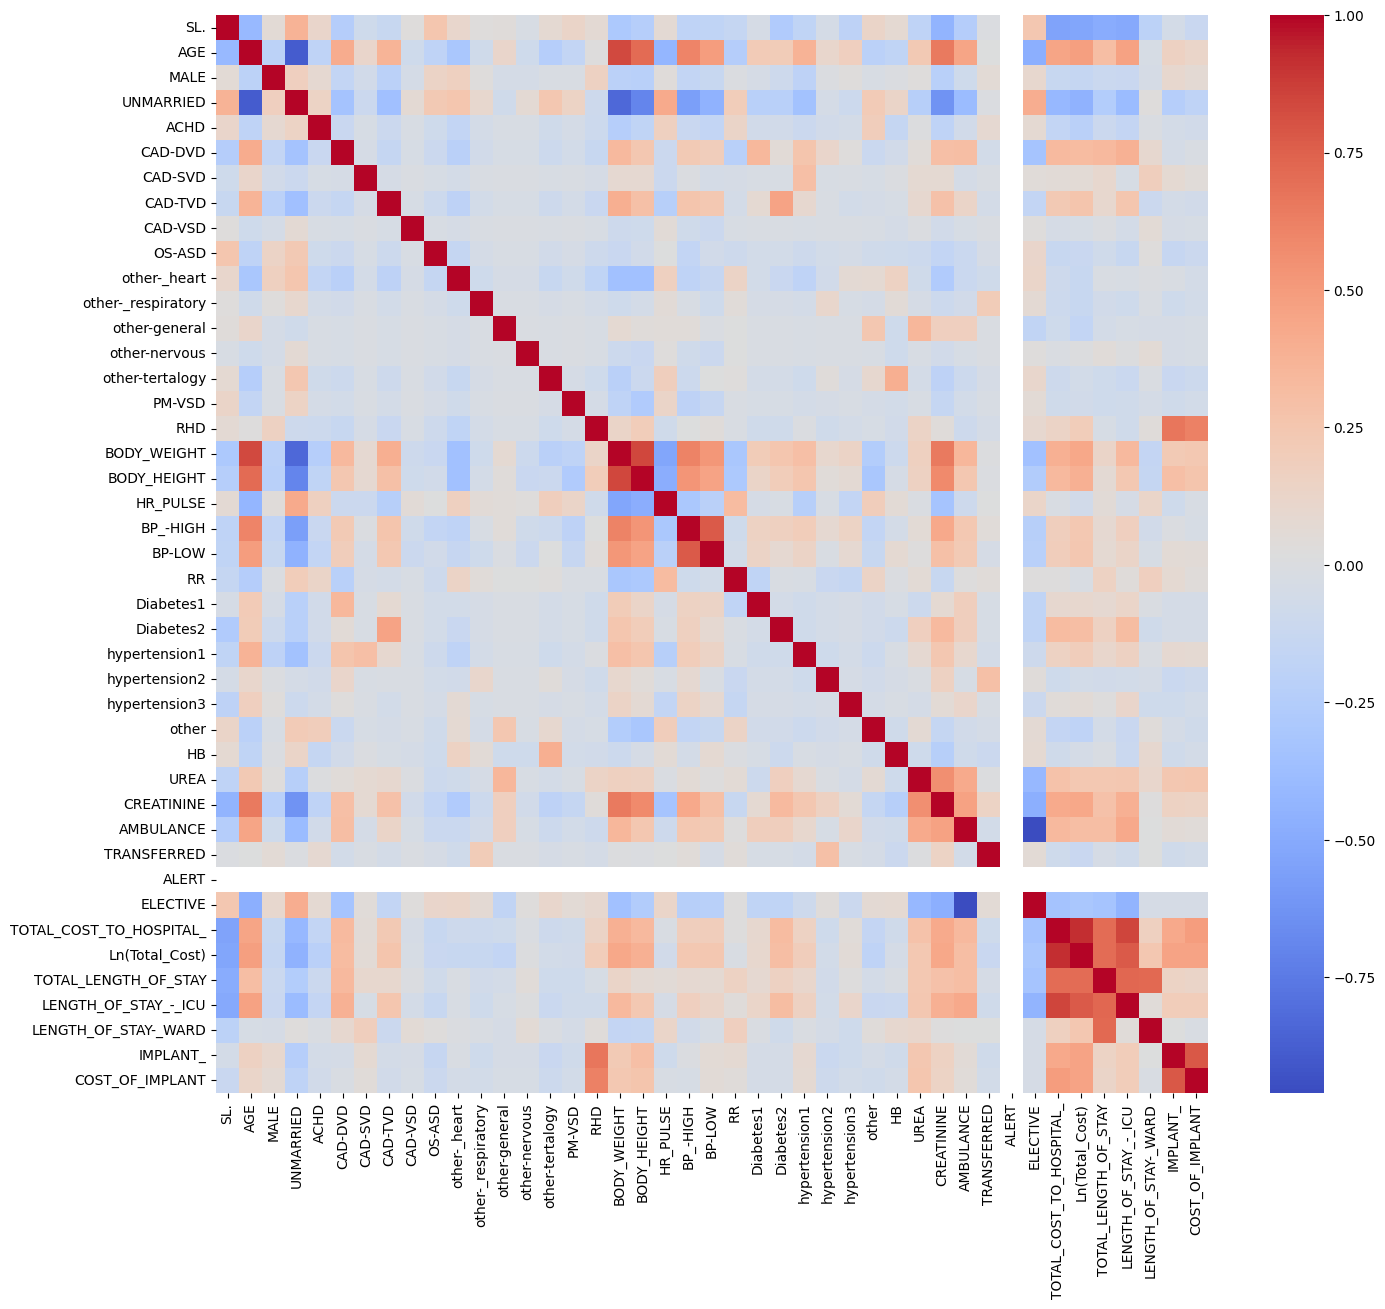

In [ ]:
df_cor = df1.corr()
plt.figure(figsize=(16,14))
sns.heatmap(df_cor, cmap='coolwarm')

In [ ]:
for a in range(len(df1.corr().columns)):
    for b in range(a):
        if(abs(df1.corr().iloc[a,b])>0.7):
            print(df1.corr().columns[a],"-", df1.corr().columns[b])
            #print(df.corr().columns)

UNMARRIED - AGE
BODY_WEIGHT - AGE
BODY_WEIGHT - UNMARRIED
BODY_HEIGHT - AGE
BODY_HEIGHT - BODY_WEIGHT
BP-LOW - BP_-HIGH
ELECTIVE - AMBULANCE
Ln(Total_Cost) - TOTAL_COST_TO_HOSPITAL_
TOTAL_LENGTH_OF_STAY - TOTAL_COST_TO_HOSPITAL_
TOTAL_LENGTH_OF_STAY - Ln(Total_Cost)
LENGTH_OF_STAY_-_ICU - TOTAL_COST_TO_HOSPITAL_
LENGTH_OF_STAY_-_ICU - Ln(Total_Cost)
LENGTH_OF_STAY_-_ICU - TOTAL_LENGTH_OF_STAY
LENGTH_OF_STAY-_WARD - TOTAL_LENGTH_OF_STAY
COST_OF_IMPLANT - IMPLANT_
